In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("raw_house_data.csv")
df=data

In [3]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [5]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [6]:
df.lot_acres.fillna(df.lot_acres.median())
df.MLS.fillna(df.MLS.median())
df.sold_price.fillna(df.sold_price.median())
df.sold_price.fillna(df.sold_price.median())
df.taxes.fillna(df.taxes.median())
df.year_built.fillna(df.year_built.median())
df.bedrooms.fillna(df.bedrooms.median())

0       13
1        2
2        2
3        7
4        4
        ..
4995     5
4996     4
4997     3
4998     4
4999     4
Name: bedrooms, Length: 5000, dtype: int64

In [7]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None


In [8]:
df.replace(to_replace ="None", value ="0")

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0,0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0


In [11]:
df.drop(df[df['year_built']== 0].index, inplace=True)

In [12]:
df.drop(df[df['lot_acres']== 0].index, inplace=True)

In [13]:
df.drop(df[df['taxes']== 0].index, inplace=True)

In [14]:
df.drop(df[df['garage']== 0].index, inplace=True)

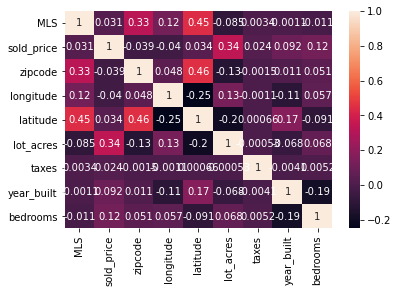

In [15]:
cor=sns.heatmap(df.corr(), annot=True)

In [16]:
df.drop(df[df['sold_price']== 0].index, inplace=True)
df.drop(df[df['sqrt_ft']== 0].index, inplace=True)
df.drop(df[df['bedrooms']== 0].index, inplace=True)
df.drop(df[df['bathrooms']== 0].index, inplace=True)
df.drop(df[df['lot_acres']== 0].index, inplace=True)
df.drop(df[df['taxes']== 0].index, inplace=True)

In [17]:
df.drop(df[df['sqrt_ft']== 'None'].index, inplace=True)
df.drop(df[df['taxes']== 'None'].index, inplace=True)
df.drop(df[df['lot_acres']== 'None'].index, inplace=True)
df.drop(df[df['sold_price']== 'None'].index, inplace=True)
df.drop(df[df['bathrooms']== 'None'].index, inplace=True)
df.drop(df[df['bedrooms']== 'None'].index, inplace=True)

In [18]:
df.drop(df[df['sqrt_ft']== 0].index, inplace=True)

In [19]:
df.drop(df[df['taxes']== 12215075.0].index, inplace=True)

In [20]:
#df.drop(df[df['taxes']== 668059.0].index, inplace=True)

In [21]:
df.drop(df[df['bedrooms']== 36].index, inplace=True)

In [22]:
max(df['taxes'])

668059.0

In [23]:
max(df['bedrooms'])

19

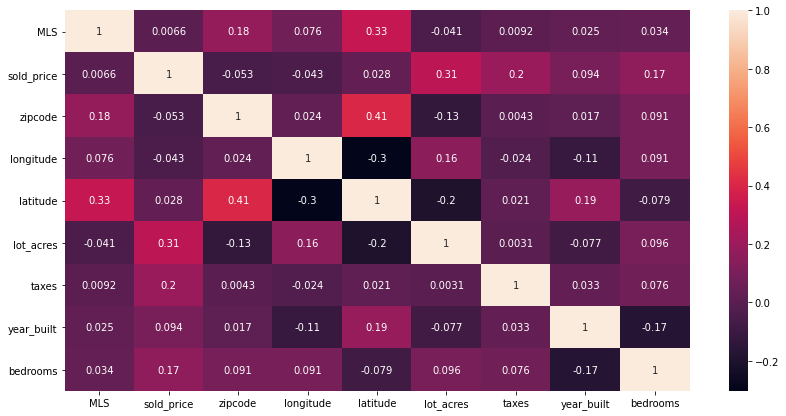

In [24]:
plt.figure(figsize=(14,7))
cor=sns.heatmap(df.corr(), annot=True)

In [26]:
df[["bathrooms","sqrt_ft"]] = df[["bathrooms", "sqrt_ft"]].astype("float")

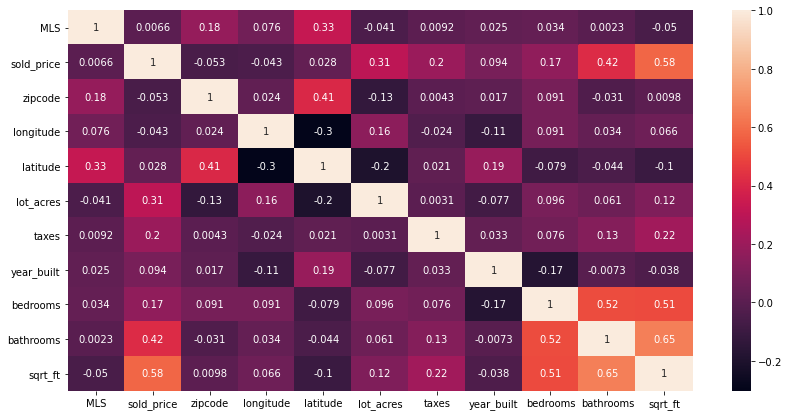

In [27]:
plt.figure(figsize=(14,7))
cor=sns.heatmap(df.corr(), annot=True)

In [29]:
selected_columns= [
    'sold_price', 'lot_acres','taxes','bedrooms', 'bathrooms', 'sqrt_ft']

In [30]:
selected_columns

['sold_price', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft']

In [31]:
df=df[selected_columns].copy()
df

,sold_price,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft
0,5300000.0,2154.00,5272.00,13,10.0,10500.0
1,4200000.0,1707.00,10422.36,2,2.0,7300.0
3,4500000.0,636.67,8418.58,7,5.0,9019.0
4,3411450.0,3.21,15393.00,4,6.0,6396.0
5,3250000.0,1.67,27802.84,3,4.0,6842.0
...,...,...,...,...,...,...
4995,495000.0,4.98,2017.00,5,3.0,3601.0
4996,550000.0,1.42,4822.01,4,3.0,2318.0
4997,475000.0,12.06,1000.00,3,2.0,1772.0
4998,550000.0,1.01,5822.93,4,4.0,3724.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4880 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  4880 non-null   float64
 1   lot_acres   4880 non-null   float64
 2   taxes       4880 non-null   float64
 3   bedrooms    4880 non-null   int64  
 4   bathrooms   4880 non-null   float64
 5   sqrt_ft     4880 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 266.9 KB


In [33]:
#new_df[["bathrooms", "garage","sqrt_ft"]] = new_df[["bathrooms", "garage","sqrt_ft"]].astype("float")
#new_df=df[selected_columns].copy()
#new_df[new_df["bathrooms"] =='None'] = 0
#set(df.bathrooms)
#p=pd.to_numeric(new_df.bathrooms)
#df["bathrooms"] = p
#p

In [34]:
#new_df[new_df["garage"] =='None'] = 0
#set(new_df.garage)
#o=pd.to_numeric(new_df.garage)
#new_df["garage"] = o
#o

In [35]:
#new_df[new_df["sqrt_ft"] =='None'] = 0
#set(new_df.sqrt_ft)
#q=pd.to_numeric(new_df.sqrt_ft)
#new_df["sqrt_ft"] = q
#q

In [36]:
df.shape

(4880, 6)

In [37]:
df = df.apply(pd.to_numeric)
df['bedrooms'].astype('float64')

0       13.0
1        2.0
3        7.0
4        4.0
5        3.0
        ... 
4995     5.0
4996     4.0
4997     3.0
4998     4.0
4999     4.0
Name: bedrooms, Length: 4880, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4880 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  4880 non-null   float64
 1   lot_acres   4880 non-null   float64
 2   taxes       4880 non-null   float64
 3   bedrooms    4880 non-null   int64  
 4   bathrooms   4880 non-null   float64
 5   sqrt_ft     4880 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 266.9 KB


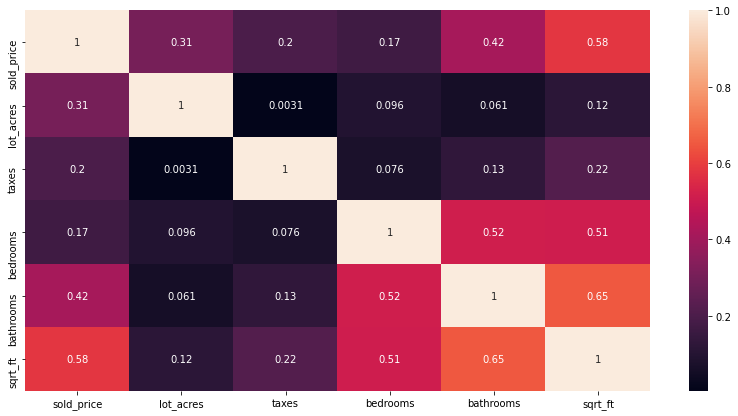

In [39]:
plt.figure(figsize=(14,7))
cor=sns.heatmap(df.corr(), annot=True)

In [97]:
df['taxes']=df['taxes']**(1/2)
df['sold_price']=df['sold_price']**(1/2)
df['bedrooms']=df['bedrooms']**(2)
df['bathrooms']=df['bathrooms']**(1/2)
df['sqrt_ft']=df['sqrt_ft']**(1/2)

In [98]:
df['taxes']

0       2.919086
1       3.178672
3       3.094959
4       3.337455
5       3.593446
          ...   
4995    2.588739
4996    2.886712
4997    2.371374
4998    2.955580
4999    2.698825
Name: taxes, Length: 4880, dtype: float64

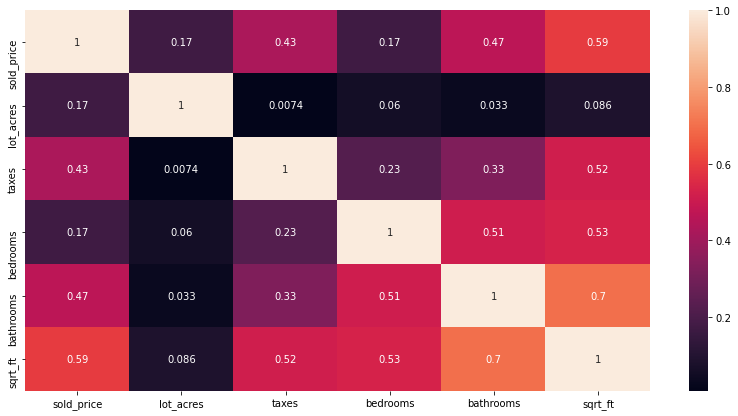

In [99]:
plt.figure(figsize=(14,7))
cor=sns.heatmap(df.corr(), annot=True)

In [100]:
#new_df[new_df["bathrooms"] =='None'] = 0
#set(new_df.bathrooms)
#p=pd.to_numeric(new_df.bathrooms)
#new_df["bathrooms"] = p
#p

In [101]:
#new_df[new_df["sqrt_ft"] =='None'] = 0
#set(new_df.sqrt_ft)
#q=pd.to_numeric(new_df.sqrt_ft)
#new_df["sqrt_ft"] = q
#q

In [102]:
factors=['bedrooms','bathrooms','lot_acres','sold_price','sqrt_ft']
df_new=df[factors]
target_variable=df['taxes']

In [103]:
df_new

,bedrooms,bathrooms,lot_acres,sold_price,sqrt_ft
0,3.605551,1.333521,2154.00,6.926829,3.181623
1,1.414214,1.090508,1707.00,6.728313,3.040292
3,2.645751,1.222845,636.67,6.786589,3.121726
4,2.000000,1.251033,3.21,6.555674,2.990464
5,1.732051,1.189207,1.67,6.516065,3.015768
...,...,...,...,...,...
4995,2.236068,1.147203,4.98,5.150218,2.783254
4996,2.000000,1.147203,1.42,5.218496,2.634142
4997,1.732051,1.090508,12.06,5.123735,2.547170
4998,2.000000,1.189207,1.01,5.218496,2.794964


In [104]:
X= df_new.to_numpy()
X

array([[3.60555128e+00, 1.33352143e+00, 2.15400000e+03, 6.92682927e+00,
        3.18162260e+00],
       [1.41421356e+00, 1.09050773e+00, 1.70700000e+03, 6.72831261e+00,
        3.04029243e+00],
       [2.64575131e+00, 1.22284454e+00, 6.36670000e+02, 6.78658924e+00,
        3.12172612e+00],
       ...,
       [1.73205081e+00, 1.09050773e+00, 1.20600000e+01, 5.12373549e+00,
        2.54717020e+00],
       [2.00000000e+00, 1.18920712e+00, 1.01000000e+00, 5.21849577e+00,
        2.79496394e+00],
       [2.00000000e+00, 1.18920712e+00, 4.16000000e+00, 5.08922397e+00,
        2.84706745e+00]])

In [105]:
X.shape


(4880, 5)

### Normalizing the data by dividing each number in each column by the max. of the column

In [106]:
N, D = X.shape
for i in range(D):
    X[:, i]=X[:, i]/np.amax(X[:, i])

In [107]:
X

array([[8.27170192e-01, 8.52044323e-01, 1.00000000e+00, 1.00000000e+00,
        9.75469057e-01],
       [3.24442842e-01, 6.96772396e-01, 7.92479109e-01, 9.71340904e-01,
        9.32137956e-01],
       [6.06976979e-01, 7.81328090e-01, 2.95575673e-01, 9.79754080e-01,
        9.57105107e-01],
       ...,
       [3.97359707e-01, 6.96772396e-01, 5.59888579e-03, 7.39694207e-01,
        7.80949228e-01],
       [4.58831468e-01, 7.59835686e-01, 4.68895079e-04, 7.53374389e-01,
        8.56921510e-01],
       [4.58831468e-01, 7.59835686e-01, 1.93129062e-03, 7.34711911e-01,
        8.72896177e-01]])

In [108]:
#X[3]=X[3]/max(X[3])
#X[3]

In [109]:
#X[4]=X[4]/max(X[4])
#X[4]

In [110]:
#X[5]=X[5]/max(X[5])
#X[5]

In [111]:
#X=np.concatenate((X[1],X[2],X[3],X[4],X[5]), axis=None)

In [112]:
y=target_variable.to_numpy()

In [113]:
y

array([2.91908624, 3.17867231, 3.09495868, ..., 2.37137371, 2.95557984,
       2.69882529])

### Split the data to trainig set and testing set

In [114]:
# extract the target variable y which is taxes here and keep all other variables as features in the matrix, call 
# the features and the target variable y

In [115]:
X.shape

(4880, 5)

In [116]:
# tarining set, take all clolumns in the first 4000 rows for both X and y

In [117]:
#extract the first 4000 rows including all columns
X_train=X[0:4000,:]
# y has only one column so extarct the first 4000 rows
y_train=y[0:4000]

In [118]:
# testing set, take the last 1000 rows and all columns for both X and y

In [119]:
X_test=X[4001:,:]

y_test=y[4001:]

In [120]:
X_train.shape

(4000, 5)

In [121]:
y_train.shape

(4000,)

In [122]:
X_test.shape

(879, 5)

In [123]:
y_test.shape

(879,)

### Linear Regression Model

In [170]:
class LinearRegression():
    def fit(self, X_train,y_train):
        self.w=np.linalg.solve(X.T@X, X.T@y)
        
    def predict(self, X_test):
        
        return np.matmul(X, self.w)

In [171]:
lr = LinearRegression()

In [172]:
lr.fit(X_train, y_train)

In [173]:
lr.w

array([ 0.08708102, -1.11398838, -0.57395116,  1.29967098,  3.23278924])

In [174]:
y_hat=lr.predict(X_test)
y_hat

array([3.00206905, 3.07304131, 3.38029681, ..., 2.74119601, 2.94262374,
       2.96917205])

In [175]:
y_hat

array([3.00206905, 3.07304131, 3.38029681, ..., 2.74119601, 2.94262374,
       2.96917205])

In [176]:
y_test

array([2.87703382, 2.9606987 , 2.85196272, 2.77297803, 2.93013787,
       2.96269358, 2.70400679, 2.99756971, 2.63514917, 2.95643551,
       2.77870295, 3.0290579 , 2.89287639, 3.02945521, 2.84167337,
       2.7558068 , 2.83534036, 2.86588462, 2.93490917, 2.93504643,
       2.96359413, 2.84348713, 3.03948631, 2.82405403, 2.95365301,
       2.87586921, 2.98144661, 2.81303156, 2.80436727, 2.86096651,
       2.82295135, 2.91379265, 2.88184891, 2.90916655, 2.92232109,
       2.80661611, 2.83117044, 2.96203425, 2.89471389, 2.9723374 ,
       2.28951435, 2.81066337, 2.40599416, 2.48175831, 2.99149589,
       2.95614098, 2.93743395, 2.83237832, 2.84483552, 2.39436599,
       2.84997369, 2.92862594, 2.88857819, 2.74599265, 2.87994089,
       2.98209974, 2.7662525 , 2.99120253, 2.921364  , 2.87458569,
       2.99355079, 2.94316435, 2.86197634, 2.89346575, 2.92167502,
       2.9640639 , 3.00071557, 2.92961111, 2.91413598, 2.8224199 ,
       2.98957458, 3.08066356, 2.56864797, 3.05245933, 2.66401

In [181]:
y_hat[4]

3.399406997802867

In [182]:
y_test[4]

2.930137874433455

In [179]:
def OLS(Y, Y_hat, N):
    return (1/(2*N))*np.sum((Y-Y_hat)**2)

def R2(Y,Y_hat):
    return(1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

### KNN Regression Model

In [133]:
class KNNRegressor():
    def fit(self, X,y):
        self.X=X
        self.y=y
    
    def predict(self,X,K,epsilon=1e-3):
    
        N=len(X)
        y_hat=np.zeros(N)
    
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
        
            idxt=np.argsort(dist2)[:K]  #indexing from a list ( asking to extract the points surrounds the particular K not all pts)
        
            gamma_k=np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
        
            y_hat[i]= gamma_k.dot(self.y[idxt])
        
        return y_hat

In [134]:
knn=KNNRegressor()

In [152]:
knn.fit(X_train,y_train)
y_hat=knn.predict(X_test,7)

In [184]:
y_hat[4]

3.399406997802867

In [185]:
y_test[4]

2.930137874433455

In [155]:
y_hat.sum()

2547.312494559196

In [156]:
y_test.sum()

2512.665731003218

In [157]:
np.mean(abs(y_hat - y_test) < 1000)

1.0

In [158]:
def OLS(Y, Y_hat, N):
    return (1/(2*N))*np.sum((Y-Y_hat)**2)

def R2(Y,Y_hat):
    return(1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [159]:
r2 = R2(y_test,y_hat)
r2

-0.10502034970760477

In [160]:
#plt. figure(figsize=(12,5))

#plt. scatter(X_train,y_train)

#plt.plot(X_test,y_hat, color='#FF0000', linewidth=3) # use g or r or b or m or k 

#plt.plot(X_test,y_hat, color='#00FF00', linewidth=3) # use g or r or b or m or k 

### The coefficient of corrlaiton is really low, about (-0.07) which means that linear regression is not the working properly to predict the values. In that case, we need to do some feature engineering!!

In [161]:
# square the taxes, didn't work 
# take the sqrt of taxes
# take the sqrt of all other variables
# change all integers 64 to floats 64
# take square root and cubic root 
# delete the outliers taxes and no. of bedrooms
# delete lot acres, not correlated in the corrlation matrix
# square root didn't improve the R squared 
# keep taxes as they are and square root others

<AxesSubplot:>

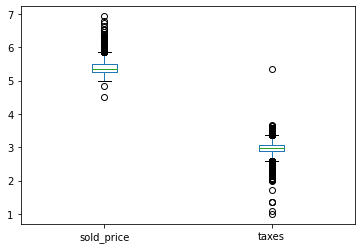

In [162]:
df[['sold_price','taxes']].plot.box()

<AxesSubplot:title={'center':'sold price vs taxes'}, xlabel='sold_price', ylabel='taxes'>

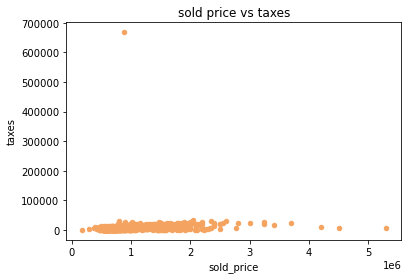

In [163]:
data.plot.scatter(x = 'sold_price', y = 'taxes',
                  color = 'sandybrown', title = 'sold price vs taxes')

<AxesSubplot:title={'center':'bedrooms vs taxes'}, xlabel='bedrooms', ylabel='taxes'>

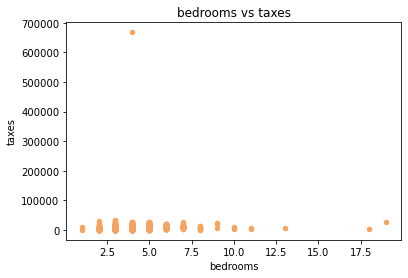

In [164]:
data.plot.scatter(x = 'bedrooms', y = 'taxes',
                  color = 'sandybrown', title = 'bedrooms vs taxes')

<AxesSubplot:title={'center':'sqrt_ft vs taxes'}, xlabel='sqrt_ft', ylabel='taxes'>

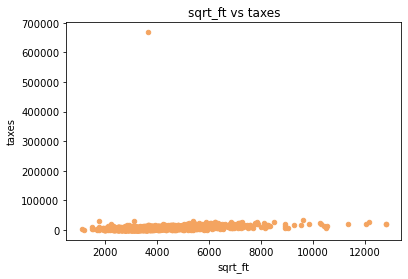

In [165]:
data.plot.scatter(x = 'sqrt_ft', y = 'taxes',
                  color = 'sandybrown', title = 'sqrt_ft vs taxes')

In [166]:
def diff(y_test, y_hat):
    diff= np.zeros(y_hat.size)
    for i in range(len(y_hat)):
        diff[i]=(abs(y_test[i]-y_hat[i])/y_test[i])*100
    return diff

diff1=diff(y_test, y_hat)
#diff2=diff(y1_test,y1_hat)

In [167]:
diff1

array([4.18378419e+00, 1.98324929e+00, 1.12401506e+00, 5.65946306e+00,
       2.94586921e-01, 1.41267989e+00, 3.38163268e+00, 3.06759832e+00,
       1.25845204e+01, 3.42802974e+00, 1.34262547e+00, 2.07069586e+00,
       1.62388642e+00, 2.89279818e+00, 6.64634056e-01, 2.65089001e+00,
       1.77993043e-01, 1.43730569e+00, 1.57917057e+00, 1.88081692e+00,
       1.10428285e+00, 3.48380621e+00, 4.52397380e+00, 3.09391244e+00,
       9.51736755e-01, 2.34843441e-01, 4.06134428e+00, 2.15751633e-01,
       9.14019147e-01, 2.49523384e+00, 3.48585243e+00, 1.09952326e+00,
       2.14927616e-01, 3.00598574e-01, 9.58937725e-01, 1.65554617e-01,
       3.53610053e-01, 5.62428781e+00, 1.76585966e+00, 3.43336034e+00,
       3.33370289e+01, 1.38427816e+00, 2.27304961e+01, 2.13440683e+01,
       2.86106567e+00, 2.23855178e+00, 1.85229529e+00, 9.03814336e+00,
       1.65713025e+00, 2.50125501e+01, 2.12326262e+00, 1.00938656e+00,
       4.93032195e-01, 3.72470892e+00, 3.11951584e+00, 4.70101577e+00,
      

In [168]:
diff1.sum()/len(diff1)

4.162540071854629

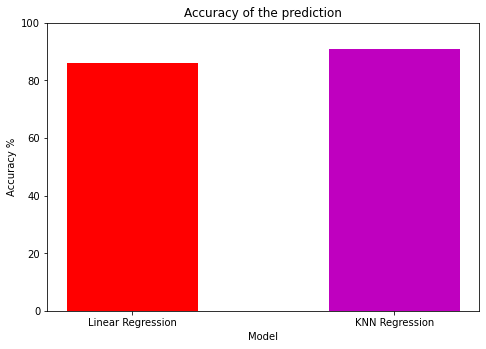

In [191]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classifier = ['Linear Regression', 'KNN Regression']
Accuracy = [86 , 91]
ax.bar( Classifier,Accuracy, color=["r","m"], width=[0.5,0.5])
plt.title('Accuracy of the prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.ylim(0,100)
plt.show()

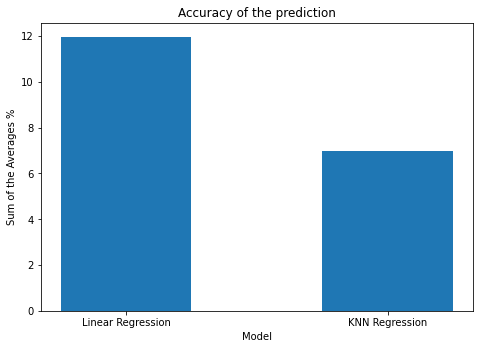

In [193]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classifier = ['Linear Regression', 'KNN Regression']
Accuracy = [11.98 , 6.97]
ax.bar( Classifier,Accuracy, width=[0.5,0.5])
plt.title('Accuracy of the prediction')
plt.xlabel('Model')
plt.ylabel('Sum of the Averages %')
plt.show()